# Revisión (primera iteración)

Hola, festudillo@gmail.com!

Mi nombre es David Esparza Jasso y estoy feliz por revisar tu proyecto el día de hoy.



Encontrarás mis comentarios abajo. - **por favor, no los muevas, modifiques o elimines**.


Puedes encontrar mis comentarios en cajas verdes, amarillas y rojas como éstas:

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Correcto. Todo se hizo correctamente!
</div>

<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

Necesita correcciones. La parte correspondiente requiere algunas correcciones. El trabajo no puede ser aprobado con comentarios rojos sin corregir.
</div>

Puedes contestarme usando este tipo de cajas:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

    
En celdas como éstas puedes dejarme tus comentarios
</div>

Recuerda que, si deseas dejarme un comentario en alguna parte del documento, sólo tienes que dar doble clic sobre la celda de arriba, copiar el código, pegarlo en una nueva celda y sustituir la frase "En celdas como éstas puedes dejarme tus comentarios" por tu propio comentario. Asegúrate sólamente que la celda donde vayas a incluir tu comentario esté en formato "Markdown".

<div class="alert alert-block alert-success">
<b>COMENTARIO GENERAL PRIMERA REVISIÓN</b> <a class="tocSkip"></a>

Felicidades! tu trabajo está aprobado! sólo te dejo 1 comentario amarillo, por favor, revísalo para que te ayude en un futuro. Saludos!

</div>

In [12]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats as st

### Ánalisis exploratorio de datos

#### Importar archivos

In [13]:
trips_by_company_DF = pd.read_csv('/datasets/project_sql_result_01.csv')

In [14]:
trips_by_location_DF = pd.read_csv('/datasets/project_sql_result_04.csv')

#### Estudio de datos

##### Cantidad de viajes por compañía

In [15]:
trips_by_company_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [16]:
trips_by_company_DF.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Buena revisión preliminar de dataframes    
</div>

##### Cantidad de viajes por destino

In [18]:
trips_by_location_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [19]:
trips_by_location_DF.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


#### Gráficos generales

##### Gráfica de Pareto para viajes por compañía

<AxesSubplot:xlabel='company_name'>

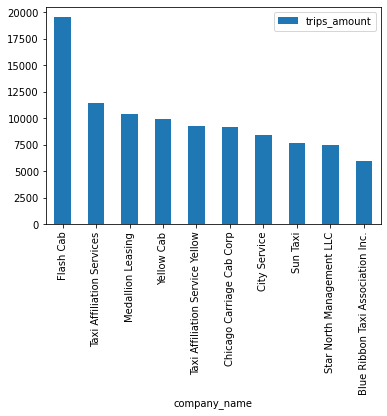

In [21]:
trips_by_company_DF.head(10).plot(kind='bar', x = 'company_name', y = 'trips_amount')

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Correcta gráfica    
</div>

###### Porcentaje de participación por compañía

In [22]:
trips_by_company_DF['percentage'] = trips_by_company_DF['trips_amount']/trips_by_company_DF['trips_amount'].sum()

In [23]:
for i in range(64):
    trips_by_company_DF.loc[i,'cumulative'] = trips_by_company_DF.loc[:i,'percentage'].sum()


In [24]:
top_pareto_by_company = trips_by_company_DF[trips_by_company_DF['cumulative']<=0.80]

In [25]:
top_pareto_by_company.loc[:,['company_name','percentage','cumulative']]

,company_name,percentage,cumulative
0,Flash Cab,0.142436,0.142436
1,Taxi Affiliation Services,0.083183,0.225619
2,Medallion Leasing,0.075500,0.301119
3,Yellow Cab,0.072012,0.373131
4,Taxi Affiliation Service Yellow,0.067722,0.440853
5,Chicago Carriage Cab Corp,0.066863,0.507716
6,City Service,0.061525,0.569241
7,Sun Taxi,0.056084,0.625325
8,Star North Management LLC,0.054293,0.679618
9,Blue Ribbon Taxi Association Inc.,0.043354,0.722972


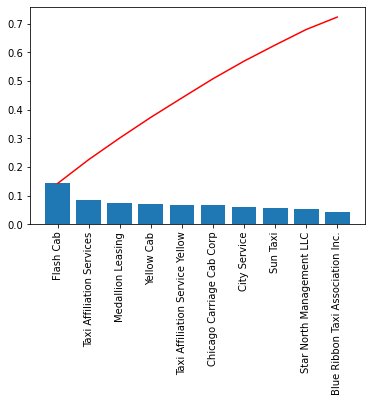

In [67]:
x1= plt.plot(top_pareto_by_company['cumulative'].head(10), color="Red")
x2= plt.bar(top_pareto_by_company['company_name'].head(10), trips_by_company_DF['percentage'].head(10))
plt.xticks(rotation=90)
plt.show()

In [96]:
print('Total available companies:', trips_by_company_DF['company_name'].count())
print('Total amount of trips:', trips_by_company_DF['trips_amount'].sum())
print('Top 1 company:', top_pareto_by_company.loc[0, 'company_name'])
print('Top 1 company #:', top_pareto_by_company.loc[0, 'trips_amount'])
print('Top 1 company %:', round(top_pareto_by_company.loc[0, 'percentage']*100,0))
print('Top 80% trips:', top_pareto_by_company['trips_amount'].sum())
print('Top 80% companies:', top_pareto_by_company['company_name'].count())

Total available companies: 64
Total amount of trips: 137311
Top 1 company: Flash Cab
Top 1 company #: 19558
Top 1 company %: 14.0
Top 80% trips: 108670
Top 80% companies: 12


- Existen un total de 64 empresas de servicio de taxi para la ciudad de Chicago.
- En total, éstas 64 empresas han realizado un total de 137,311 viajes en conjunto.
- Flash Cab el más demandado con un total de 19,558, el 14% del total de los viajes.
- El 80% de los viajes (108,670) en la ciudad está comprendido por solamente 12 empresas.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Ok, muy interesante!    
</div>

##### Gráfica de Pareto para viajes por locación

<AxesSubplot:xlabel='dropoff_location_name'>

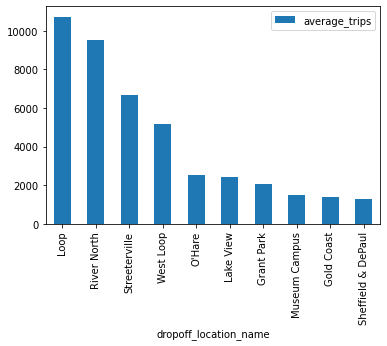

In [68]:
trips_by_location_DF.head(10).plot(kind='bar', y = 'average_trips', x = 'dropoff_location_name')

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Bien!    
</div>

###### Porcentaje de participación por locación

In [69]:
trips_by_location_DF['percentage'] = trips_by_location_DF['average_trips']/trips_by_location_DF['average_trips'].sum()

In [70]:
for i in range(94):
    trips_by_location_DF.loc[i,'cumulative'] = trips_by_location_DF.loc[:i,'percentage'].sum()

In [71]:
top_pareto_by_location = trips_by_location_DF[trips_by_location_DF['cumulative']<=0.80]

In [72]:
top_pareto_by_location.loc[:,['dropoff_location_name','percentage','cumulative']]

,dropoff_location_name,percentage,cumulative
0,Loop,0.190218,0.190218
1,River North,0.168872,0.359090
2,Streeterville,0.118177,0.477267
3,West Loop,0.091561,0.568829
4,O'Hare,0.045161,0.613990
5,Lake View,0.042928,0.656918
6,Grant Park,0.036679,0.693597
7,Museum Campus,0.026775,0.720372
8,Gold Coast,0.024190,0.744563
9,Sheffield & DePaul,0.022338,0.766901


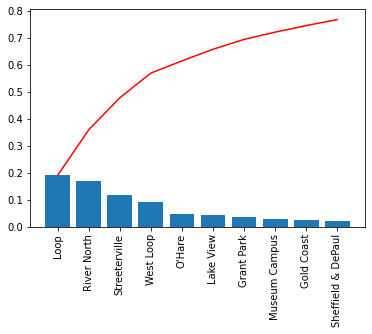

In [74]:
plt.plot(top_pareto_by_location['cumulative'].head(10), color="Red")
plt.bar(top_pareto_by_location['dropoff_location_name'].head(10), trips_by_location_DF['percentage'].head(10))
plt.xticks(rotation=90)
plt.show()

In [95]:
print('Total available locations:', trips_by_location_DF['dropoff_location_name'].count())
print('Total amount of trips:', round(trips_by_location_DF['average_trips'].sum()))
print('Top 1 destination:', top_pareto_by_location.loc[0, 'dropoff_location_name'])
print('Top 1 destination #:', round(top_pareto_by_location.loc[0, 'average_trips']))
print('Top 1 destination %:', round(top_pareto_by_location.loc[0, 'percentage'],2))
print('Top 80% trips amount:', round(top_pareto_by_location['average_trips'].sum()))
print('Top 80% destination:', top_pareto_by_location['dropoff_location_name'].count())

Total available locations: 94
Total amount of trips: 56396
Top 1 destination: Loop
Top 1 destination #: 10727
Top 1 destination %: 0.19
Top 80% trips amount: 44496
Top 80% destination: 11


- Existen un total de 94 puntos de destino registrados en la ciudad de Chicago.
- En total, se registraron 56,396 viajes durante el mes de Noviembre.
- Loop es el punto de destino más demandado con un total de 44,496 viajes, el 19% del total de los viajes.
- El 80% de los viajes (44,496) en la ciudad está concentrado en 11 destinos.

### Prueba de hipótesis

#### Importar archivos

In [97]:
trips_to_airport_DF = pd.read_csv('/datasets/project_sql_result_07.csv')

#### Estudio de datos

In [98]:
trips_to_airport_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [99]:
trips_to_airport_DF.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


#### Prueba de hipótesis sobre los días lluviosos

***Hipótesis nula = La duración promedio de los viajes desde Loop hasta el Aeropuerto Internacional es igual en días con y sin lluvia.***

<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>

Correcto, pero también hay que anotar cuál es la hipótesis alternativa.</div>

In [101]:
good_weather_duration = trips_to_airport_DF[trips_to_airport_DF['weather_conditions']=='Good']['duration_seconds']
bad_weather_duration = trips_to_airport_DF[trips_to_airport_DF['weather_conditions']=='Bad']['duration_seconds']

In [105]:
print(round(good_weather_duration.mean(),2))
print(round(bad_weather_duration.mean(),2))

1999.68
2427.21


In [106]:
print(round(np.var(good_weather_duration),2))
print(round(np.var(bad_weather_duration),2))

575732.93
517403.56


In [108]:
print(len(good_weather_duration))
print(len(bad_weather_duration))

888
180


In [109]:
alpha = 0.05
results = st.ttest_ind(good_weather_duration,bad_weather_duration,equal_var=False)
print('p_value',results.pvalue)

if (results.pvalue < alpha):
    print('Se rechaza la hipótesis nula')
else:
    print('No se rechaza la hipótesis nula')

p_value 6.738994326108734e-12
Se rechaza la hipótesis nula


#### Comentarios sobre la prueba de hipótesis

- La hipótesis nula ha sido planteada para probar la igualdad de dos poblaciones estadísticas.

- El criterio utilizado para probar la hipótesis nula corresponde a una  hipótesis de dos colas, sobre la igualdad de las medias tomando en cuenta tamaños de muestra y varianzas diferentes.

- El resultado de la prueba nos muestra que la probabilidad de que la diferencia entre la duración de viaje con y sin lluvia sea aleatoria es más baja que el estadístico de prueba. Esto es razón suficiente para rechazar la hipótesis nula. 

- En conclusión, la duración de viajes promedio entre días con buen clima y mal clima es diferente por contribución del factor lluvia.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Correcta prueba T e interpretación!    
</div>